In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('D:\Twitter Sentiment Analysis NLP/tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [4]:
# Checking the null values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
# Checking the class balance
data['label'].value_counts(normalize=True)

# 0 means Positive sentiment and 1 means Negative sentiment

0    0.744192
1    0.255808
Name: label, dtype: float64

<AxesSubplot: >

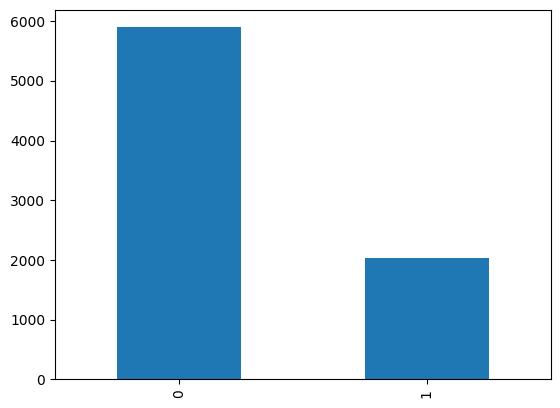

In [6]:
# plotting the label counts 
data['label'].value_counts().plot(kind='bar')

In [7]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [8]:
# Importing regular expression library
import re

In [9]:
# Substituting 's with " is" 
re.sub(r"'s\b", " is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [10]:
# Removing the user mentions
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [11]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [12]:
# removing the hashtags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [13]:
re.sub("#", "", data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [15]:
# Removing the hyperlinks
re.sub(r"http\S+", "", data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [16]:
# Retain on the alphabets (get rid of punctuations, special char, digits)
data['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [17]:
re.sub(r"[^a-zA-Z]", " ", data['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [18]:
# Stop words Removal
import nltk
from nltk.corpus import stopwords

In [20]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'shouldn', 'how', 'the', "you've", 'what', 'up', 'during', 'own', "shouldn't", 'just', 'yourselves', 'those', 'we', 'until', 'can', 'these', 'ourselves', 'they', "it's", 'most', 'other', 'but', 'above', "won't", 'out', 'nor', 'when', 'him', 'by', 'theirs', 'mightn', 'doing', 'no', 'don', 'it', 'were', 'are', "you'd", 'them', "hadn't", 'he', 'then', 'from', 'herself', 'have', 'of', 'where', 'with', 'had', 'very', 'his', 'whom', 'not', 'so', "mustn't", 'once', "shan't", 'our', 'this', 'shan', 'at', "should've", 'under', "weren't", 'll', 'their', 'am', 'being', 'me', 'having', "don't", 'haven', 'she', 'further', 'same', "hasn't", 'needn', 'through', 'if', 'is', 're', 'both', 'off', 'over', 'only', 'again', "you'll", "isn't", 'aren', 'wasn', "she's", 'against', 'on', 'there', "needn't", 'any', 've', 'as', 'ours', 'to', 'hasn', 'after', 'for', "aren't", 'why', 'more', 'won', 'you', 'wouldn', 'hers', 'itself', 'which', 'such', 'i', 'into', 'about', 'each', 't', 'your', 'an', 'mustn', 's', '

In [21]:
len(nltk_stopwords)

179

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'how', 'the', 'what', 'inc', 'yourselves', 'we', 'seem', 'cant', 'put', 'fifteen', 'namely', 'ourselves', 'they', 'most', 'anyhow', 'other', 'hereupon', 'above', 'out', 'enough', 'system', 'nor', 'four', 'him', 'beyond', 'otherwise', 'would', 'beforehand', 'by', 'seems', 'top', 'whereupon', 'although', 'it', 'go', 'were', 'serious', 'mostly', 'whither', 'then', 'onto', 'latterly', 'something', 'everything', 'where', 'two', 'could', 'detail', 'had', 'often', 'un', 'moreover', 'not', 'so', 'everyone', 'once', 'our', 'this', 'wherever', 'at', 'one', 'interest', 'see', 'being', 'am', 'me', 'afterwards', 'through', 'became', 'hence', 'side', 'hasnt', 'bottom', 'around', 'mine', 'sometime', 'neither', 'off', 'next', 'thru', 'over', 'nevertheless', 'only', 'though', 'against', 'name', 'take', 'whose', 'least', 'nine', 'somewhere', 'call', 'sometimes', 'ours', 'nobody', 'to', 'for', 'every', 'part', 'first', 'why', 'seemed', 'itself', 'six', 'find', 'along', 'such', 'thence', 'none', 'nothing

In [23]:
len(sklearn_stopwords)

318

In [24]:
# Finding the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'how', 'the', 'up', 'what', 'own', 'during', 'yourselves', 'those', 'we', 'until', 'can', 'these', 'ourselves', 'they', 'most', 'other', 'but', 'above', 'out', 'nor', 'when', 'him', 'by', 'no', 'it', 'were', 'are', 'them', 'he', 'then', 'from', 'herself', 'have', 'of', 'where', 'with', 'had', 'very', 'his', 'whom', 'not', 'so', 'once', 'our', 'this', 'at', 'under', 'their', 'am', 'being', 'me', 'she', 'further', 'same', 'through', 'if', 'is', 're', 'both', 'off', 'over', 'only', 'again', 'against', 'on', 'there', 'any', 'as', 'ours', 'to', 'after', 'for', 'why', 'more', 'you', 'hers', 'itself', 'which', 'such', 'i', 'into', 'about', 'each', 'your', 'an', 'myself', 'themselves', 'now', 'yours', 'while', 'been', 'because', 'should', 'who', 'my', 'all', 'be', 'her', 'its', 'between', 'here', 'himself', 'some', 'will', 'a', 'and', 'below', 'before', 'was', 'few', 'than', 'yourself', 'do', 'or', 'has', 'too', 'in', 'down', 'that'}


In [25]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [26]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [27]:
len(combined_stopwords)

378

In [28]:
# Text Normalization:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [29]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [30]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
new_sent = ''
for token in data['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [37]:
!pip install contractions

     -------------------------------------- 289.9/289.9 kB 6.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import contractions

In [33]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [34]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [ ]:
## Combining all the above steps into a single function whihc will clean the data

In [35]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [36]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [37]:
cleaned_tweets[:5]    

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [38]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...


In [46]:
## Data Visualization: to visualize the top 25 most common words in the tweets

In [39]:
# Writing a code to collect all the words from all the tweets into a single list
all_words = []
for t in data['tweet']:
    all_words.extend(t.split()) ## importance of extend function here

print(all_words[:50])
len(set(all_words))

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


34348

In [40]:
import matplotlib.pyplot as plt

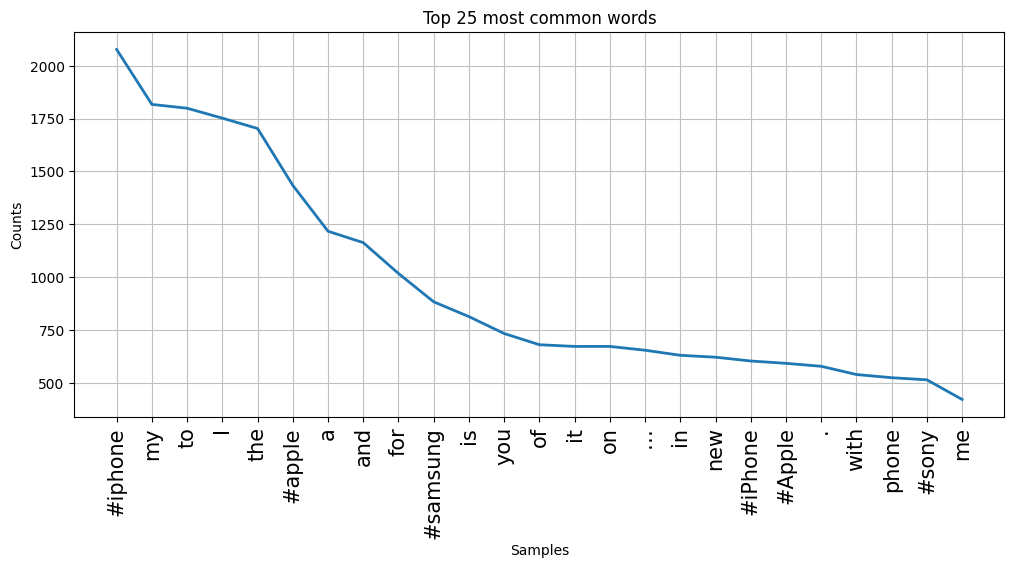

In [41]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [42]:
# Plot for cleaned tweets
all_words_cleaned = []
for c in data['cleaned_tweets_w/o_SW']:
    all_words_cleaned.extend(c.split()) ## importance of extend function here

print(all_words_cleaned[:50])
len(set(all_words_cleaned))

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


15981

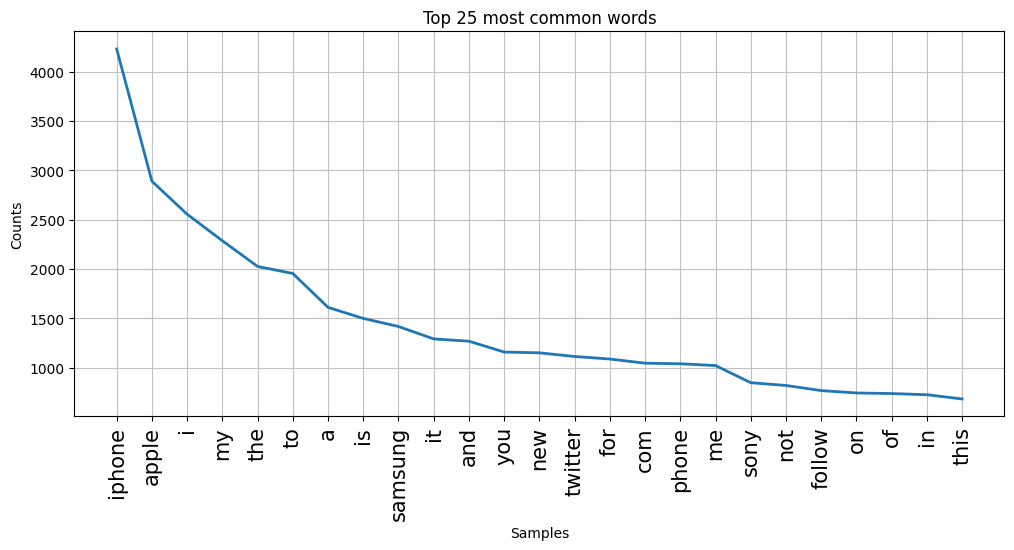

In [43]:
freq_dist = nltk.FreqDist(all_words_cleaned)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [ ]:
# Data Visualization after applying Stop words

In [45]:
type(combined_stopwords)

set

In [46]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [47]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [48]:
data.columns

Index(['id', 'label', 'tweet', 'cleaned_tweets_w/o_SW'], dtype='object')

In [49]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...,love talk makememories unplug relax iphone sma...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...,amazing service apple talk question unless pay...


In [50]:
# Plot for cleaned tweets with stopwords
all_words_cleaned_with_SW = []
for c in data['cleaned_tweets_with_SW']:
    all_words_cleaned_with_SW.extend(c.split()) ## importance of extend function here

print(all_words_cleaned_with_SW[:50])
len(set(all_words_cleaned_with_SW))

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


15350

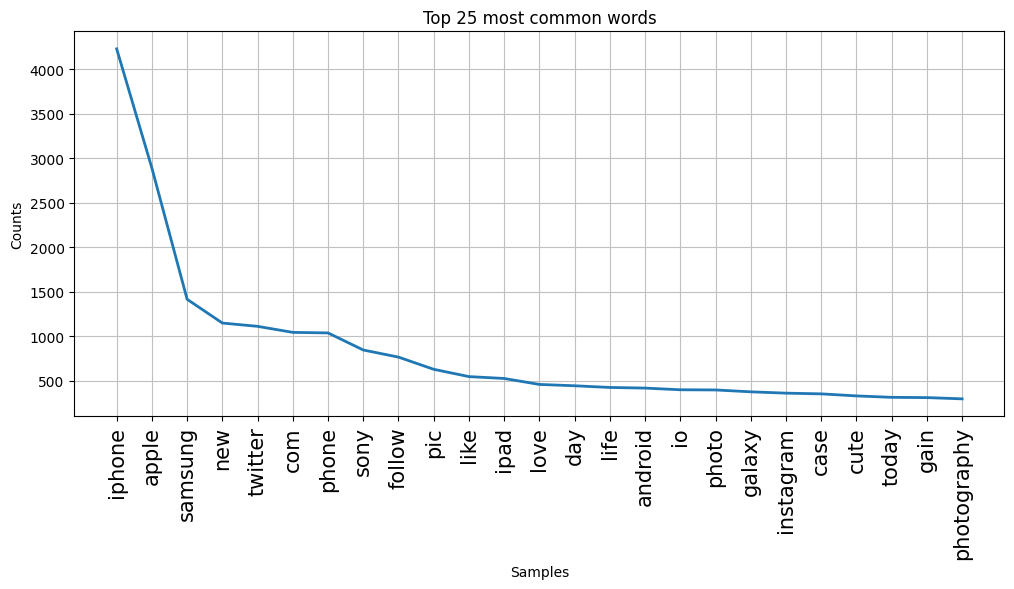

In [51]:
freq_dist = nltk.FreqDist(all_words_cleaned_with_SW)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [79]:
# Further advancements
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [ ]:
## Bag of Words Model for Feature Extraction using Countvectorizer and TF-IDF Vectorizer

In [53]:
from sklearn.feature_extraction.text import CountVectorizer 
CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_w/o_SW'])

In [54]:
CV_features.shape

(7920, 15955)

In [55]:
CV_features[0]

<1x15955 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [56]:
type(CV_features[0])  # each row is of type compressed spare row 

scipy.sparse._csr.csr_matrix

In [57]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
df = pd.DataFrame(CV_features.todense() )
df  

,0,1,2,3,4,5,6,7,8,9,...,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df.size  # these many elements/numbers are presnt in the df

126363600

In [60]:
import numpy as np
np.count_nonzero(df)

114973

In [62]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements i nthe df

0.09098585352110893

In [63]:
print(CV.get_feature_names_out()[:50])  # these the vocab words

['aa' 'aaaahhhhhhh' 'aag' 'aah' 'aalborg' 'aand' 'aapl' 'aarhus' 'aaron'
 'aarp' 'aarrrggghhhh' 'aashamsakal' 'aaydojbfkq' 'aayp' 'ab' 'abah'
 'abareta' 'abay' 'abb' 'abc' 'abdou' 'abe' 'aber' 'abercrombie' 'abi'
 'ability' 'abit' 'able' 'ableton' 'abnqum' 'aboard' 'about' 'aboutalook'
 'aboutdamntime' 'abouttime' 'abouttonight' 'above' 'abp' 'abscbn'
 'absence' 'absolute' 'absolutely' 'absurd' 'abu' 'abudhabi' 'abuja'
 'abujacity' 'abujafct' 'abujapeople' 'abujaphones']


In [64]:
len(CV.get_feature_names_out())

15955

In [ ]:
## Model Building

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, data['label'], test_size=0.25, stratify=data['label'], random_state=42)

## Stratify option makes sure that the training and test set have the same amount of '0' and '1' since the data is an imbalances data having 75% '0' and 25% '1'

In [66]:
## this model is overfitted. One of the reasons can be that it has been given too much information to predict.
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score) 

0.9779461279461279
0.8813131313131313


In [67]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)

0.9038720538720538
0.8813131313131313


In [68]:
## Cross Validating the Logistic Regression Model
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [69]:
X = CV_features
y = data['label']

In [70]:
## crOSS VALIDATE THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

[0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
88.28 0.93


In [71]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [72]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [73]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [74]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.05303030303028

In [75]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!

93.27967171717171

In [76]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

88.28 0.93


In [80]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

86.87 1.07


15673

In [81]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

86.77 1.03


1086

In [82]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

85.24 1.3


300

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

86.82 0.14
85.24 0.84


1000

In [83]:
# Unigrams + Bigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.89 0.21
86.84 0.68


3322

In [84]:
pip install --upgrade joblib==1.1.0

     -------------------------------------- 307.0/307.0 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.0 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
import joblib
joblib.__version__

'1.1.1'

In [88]:
pip install mglearn

     -------------------------------------- 581.4/581.4 kB 7.3 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import mglearn

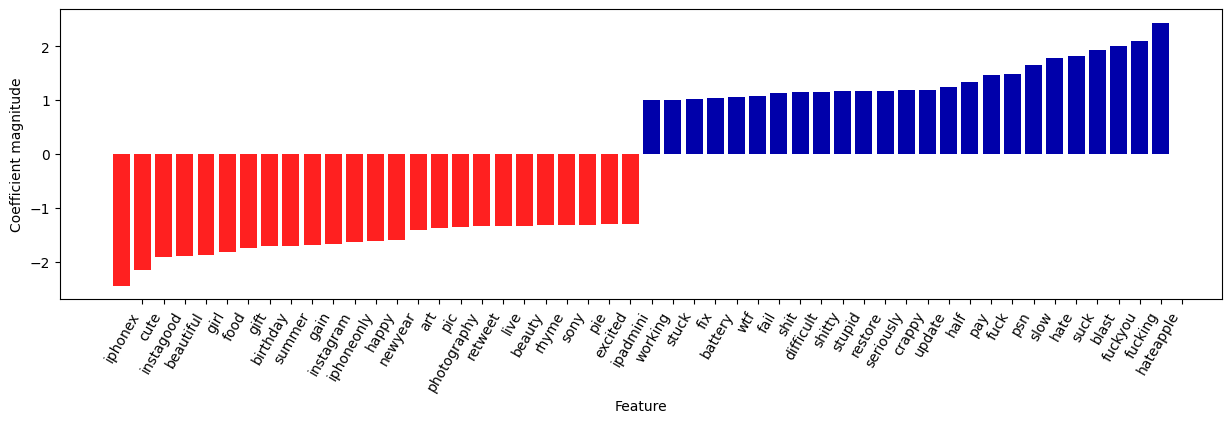

In [92]:
# Most important features when using unigrams, bigrams, and trigrams with tf-idf rescaling

# extract feature names and coefficients for Unigram Model
# CV = CV_pipe.named_steps['CV']
feature_names = np.array(CV.get_feature_names_out())
# LR = CV_pipe.named_steps['LR']


LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=25)

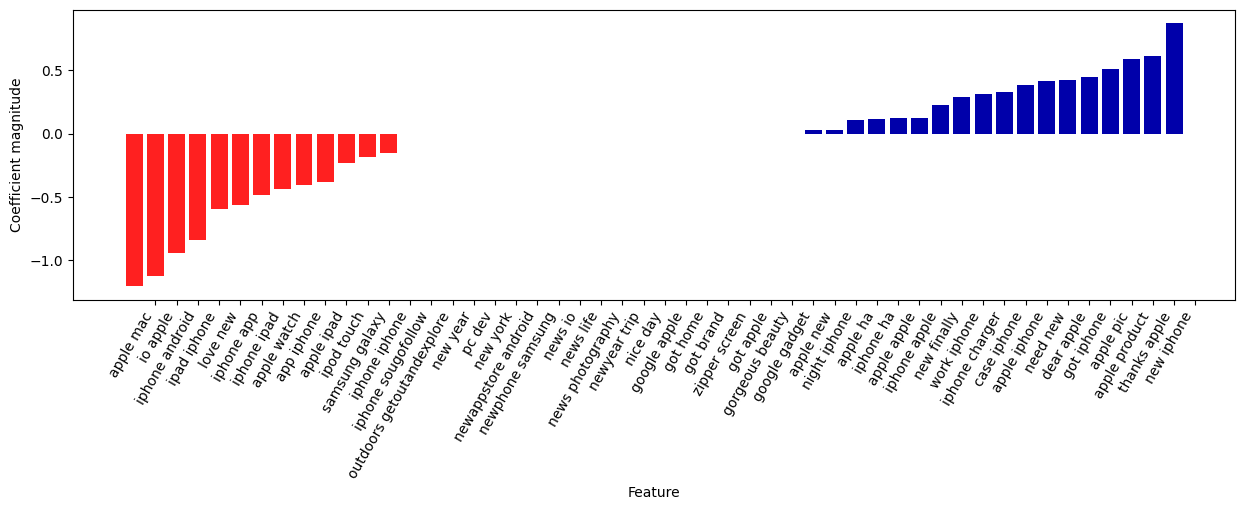

In [94]:
# Visualizing only the trigrams
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 2-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)

In [98]:
# Unigrams + Bigrams + Trigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.88 0.2
86.84 0.68


3871

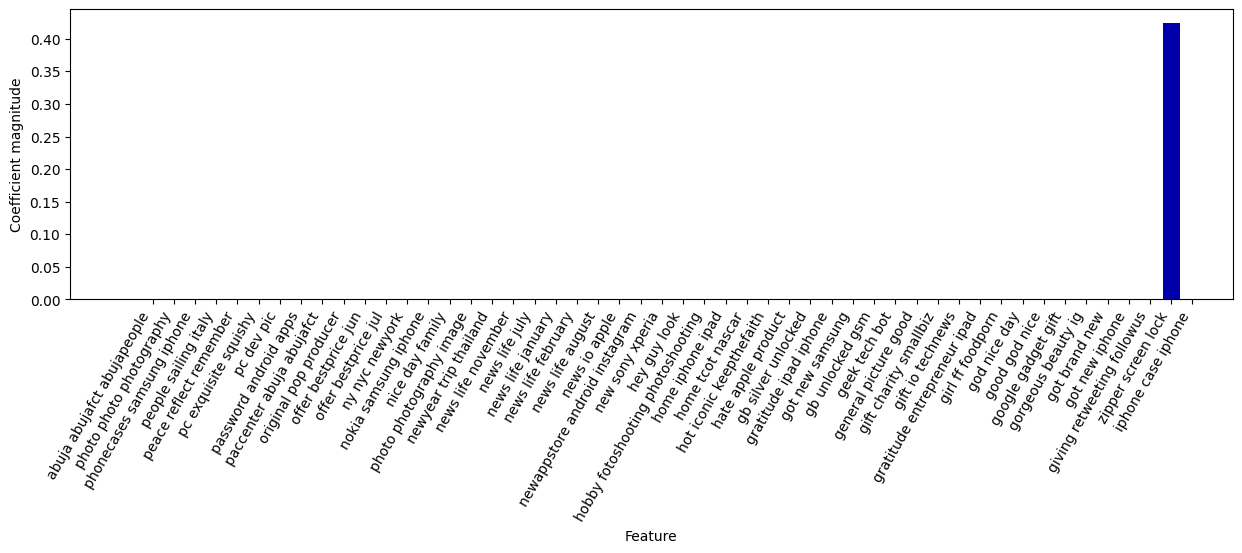

In [99]:
# Visualizing only the trigrams
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
feature_names = np.array(CV.get_feature_names_out())

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)